In [1]:
# Importing the libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Importing the dataset
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
y = df["label"]
X = df.drop('label', axis = 1)

In [8]:
X.shape

(42000, 784)

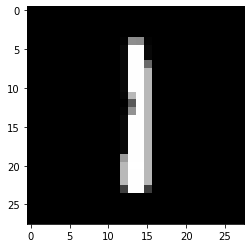

In [9]:
plt.imshow(X.iloc[2].values.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

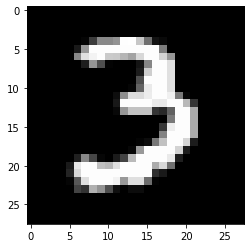

In [10]:
plt.imshow(X.iloc[9].values.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
# class 1 if digit 1 class 0 if others digits
y = [1 if (x == 1) else 0 for x in y]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [13]:
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    
    def __init__(self, normalize=True, alpha=0.001, epsilon=1e-4, max_iter=100):
        self.to_normalize = normalize
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iter = max_iter

    def fit(self, X, y):
      
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        if self.to_normalize == True:
            X, self.mean, self.std = self.normalize(X)
        
        X = self.prepare_X(X)
        
        theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
        y = y.reshape((X.shape[0], 1))
        
        self.X_ = X
        self.y_ = y
        
        self.coef_, self.Js = self.gradient_descent(self.X_, self.y_, theta)
    
    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        if self.to_normalize == True:
            X = (X - self.mean) / self.std
            
        X = self.prepare_X(X)           
        pred = self.h(X, self.coef_)
        y_pred = [1 if (x >= 0.5) else 0 for x in pred]
        #y_pred = self.to_classlabel(pred)
        return y_pred
    
    def to_classlabel(self, z):
        return z.argmax(axis=1)
    
    def normalize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_new = (X - mean) / std
        return X_new, mean, std
    
    def prepare_X(self, X):
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new
    
    def gradient_descent(self, X, y, theta):
        self.n_iter = 0
        m = X.shape[0]
        J_history = []
        J = self.cost_function(X, y, theta)
        J_history.append(J)
        for i in range(self.max_iter):
            self.n_iter = i
            delta = self.derivative_theta(X, y, theta)
            theta = theta - self.alpha * delta
            J = self.cost_function(X, y, theta)
            J_history.append(J)
            if abs(J.max()-J_history[-2].max()) < self.epsilon:
                break
            
        return theta, J_history
    
    def softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
    
    def sigmoid(self, z):
        g = 1 / (1 + np.exp(-z))
        return g
    
    def h(self, X, theta):
        z = np.dot(X, theta)
        #return self.softmax(z)
        return self.sigmoid(z)
    
    def cost_function(self, X, y, theta):
        m = X.shape[0]
        if m ==0:
            return None

        h = self.h(X, theta)
        J = (1 / m) * ((-y.T).dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
        return J
    
    def derivative_theta(self, X, y, theta):
        m = X.shape[0]
        if m == 0:
            return None
        h = self.h(X, theta)
        d_theta = (1 / m) * X.T.dot(h - y)
        
        return d_theta

In [14]:
#normalize
X_train = X_train / 255
X_test = X_test / 255

In [15]:
lg = CustomLogisticRegression(normalize=False, alpha=0.01, epsilon=1e-6, max_iter=10000)

lg.fit(X_train, y_train)

In [16]:
lg.coef_.shape

(785, 1)

In [17]:
lg.n_iter

7836

In [18]:
y_test_pred = lg.predict(X_test)

In [19]:
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred})
print(res)

      y_actual  y_pred
0            0       0
1            0       0
2            0       0
3            0       0
4            0       0
...        ...     ...
8395         1       1
8396         0       0
8397         0       0
8398         0       0
8399         1       1

[8400 rows x 2 columns]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [22]:
print('Custom Logistic Regression (Test)')
print('Accuracy       : ', accuracy)
print('Precision      : ', precision)
print('Recall         : ', recall)

Custom Logistic Regression (Test)
Accuracy       :  0.9886904761904762
Precision      :  0.9502645502645503
Recall         :  0.9492600422832981


In [23]:
y_train_pred = lg.predict(X_train)

In [24]:
accuracy_tr = accuracy_score(y_train, y_train_pred)
precision_tr = precision_score(y_train, y_train_pred)
recall_tr = recall_score(y_train, y_train_pred)

In [25]:
print('Custom Logistic Regression (Train)')
print('Accuracy       : ', accuracy_tr)
print('Precision      : ', precision_tr)
print('Recall         : ', recall_tr)

Custom Logistic Regression (Train)
Accuracy       :  0.9888690476190476
Precision      :  0.9523937600860678
Recall         :  0.9472980203317282


In [26]:
lg.coef_

array([[-1.13059700e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.43442539e-05],
       [-5.15677262e-05],
       [-2.24328389e-05],
       [-9.34701622e-07],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-8.21267681e-07],
       [-2.62215363e-06],
       [-1.07860246e-05],
       [-4.19995015e-05],
       [-8.93587787e-04],
       [-9.2

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [28]:
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_test_pred2 = classifier.predict(X_test)

In [30]:
accuracy2 = accuracy_score(y_test, y_test_pred2)
precision2 = precision_score(y_test, y_test_pred2)
recall2 = recall_score(y_test, y_test_pred2)

In [31]:
print('Logistic Regression (Test)')
print('Accuracy       : ', accuracy2)
print('Precision      : ', precision2)
print('Recall         : ', recall2)

Logistic Regression (Test)
Accuracy       :  0.991904761904762
Precision      :  0.9572916666666667
Recall         :  0.9714587737843552


In [32]:
y_train_pred2 = classifier.predict(X_train)

In [33]:
accuracy_tr2 = accuracy_score(y_train, y_train_pred2)
precision_tr2 = precision_score(y_train, y_train_pred2)
recall_tr2 = recall_score(y_train, y_train_pred2)

In [34]:
print('Logistic Regression (Train)')
print('Accuracy       : ', accuracy_tr2)
print('Precision      : ', precision_tr2)
print('Recall         : ', recall_tr2)

Logistic Regression (Train)
Accuracy       :  0.9944345238095238
Precision      :  0.975622823466381
Recall         :  0.9743178170144462


In [35]:
classifier.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.61557630e-05, -3.54984897e-05, -1.36808260e-07,
        -5.70034418e-09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -6.70730188e-08,
        -1.96693112e-07,  8.29455964e-10, -1.83583967e-03,
        -8.93425836e-02, -9.06859962e-02, -7.41883211e-02,
        -5.84903947e-02, -6.01032305e-02, -3.09301201e-02,
        -5.94630744e-02, -6.69054254e-02, -1.69125360e-01,
        -6.82248461e-02, -1.77409973e-03, -2.69445232e-05,
        -5.50130008e-05, -1.51631584e-05, -4.28055140e-0

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[0.001,0.01,1,5,10], 'max_iter':[5000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 5, 10], 'max_iter': [5000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
y_pred_acc = grid_clf_acc.predict(X_test)

print('Logistic Regression (Test)')
print('Accuracy       : ', accuracy_score(y_test,y_pred_acc))
print('Precision      : ', precision_score(y_test,y_pred_acc))
print('Recall         : ', recall_score(y_test,y_pred_acc))

Logistic Regression (Test)
Accuracy       :  0.991904761904762
Precision      :  0.9572916666666667
Recall         :  0.9714587737843552
